In [1]:
from utils import *

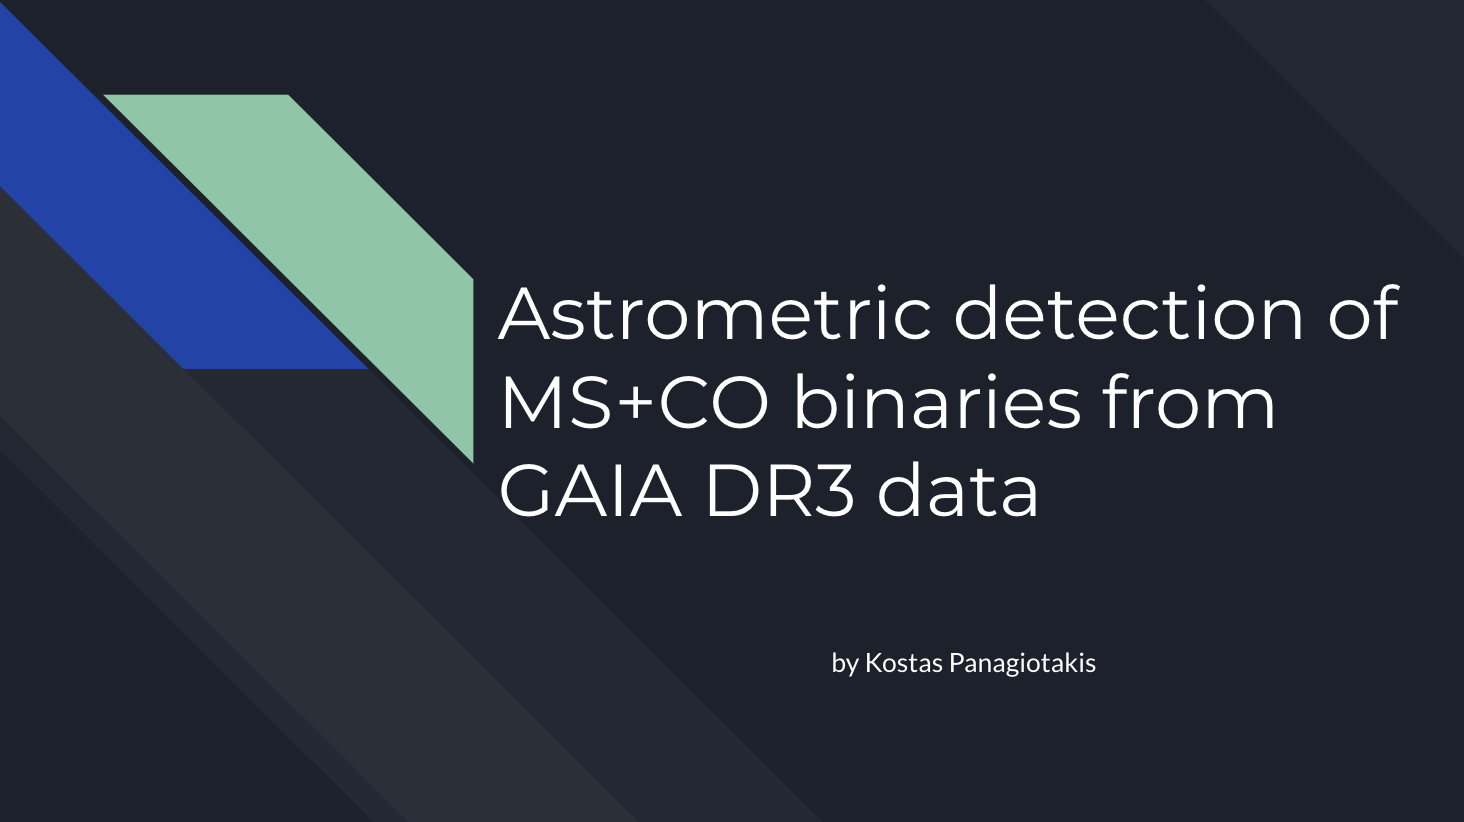

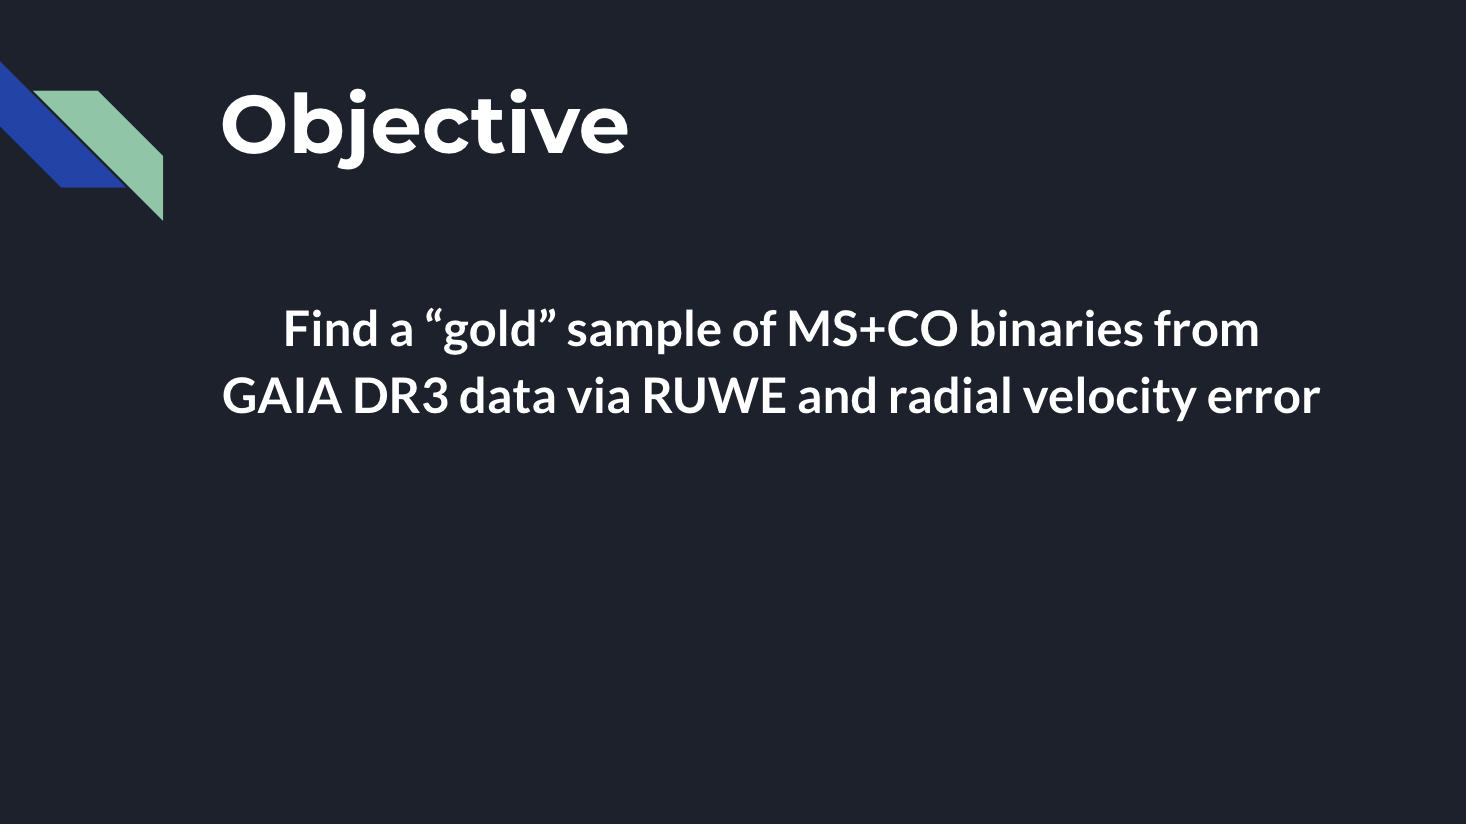

In [2]:
from IPython.display import Image, display

# Display an image from a local file with specified size
img_path = 'images/Title.png'
display(Image(filename=img_path, width=1000, height=800))  # Adjust width and height as needed

# Display an image from a local file with specified size
img_path = 'images/Objective.png'
display(Image(filename=img_path, width=1000, height=800))  # Adjust width and height as needed

1) Simulate Binary ICs

2) Feed them to a stellar evolution package to simulate binaries parameters

3) Obtain Remnant Type from "realistic" gaia like systems

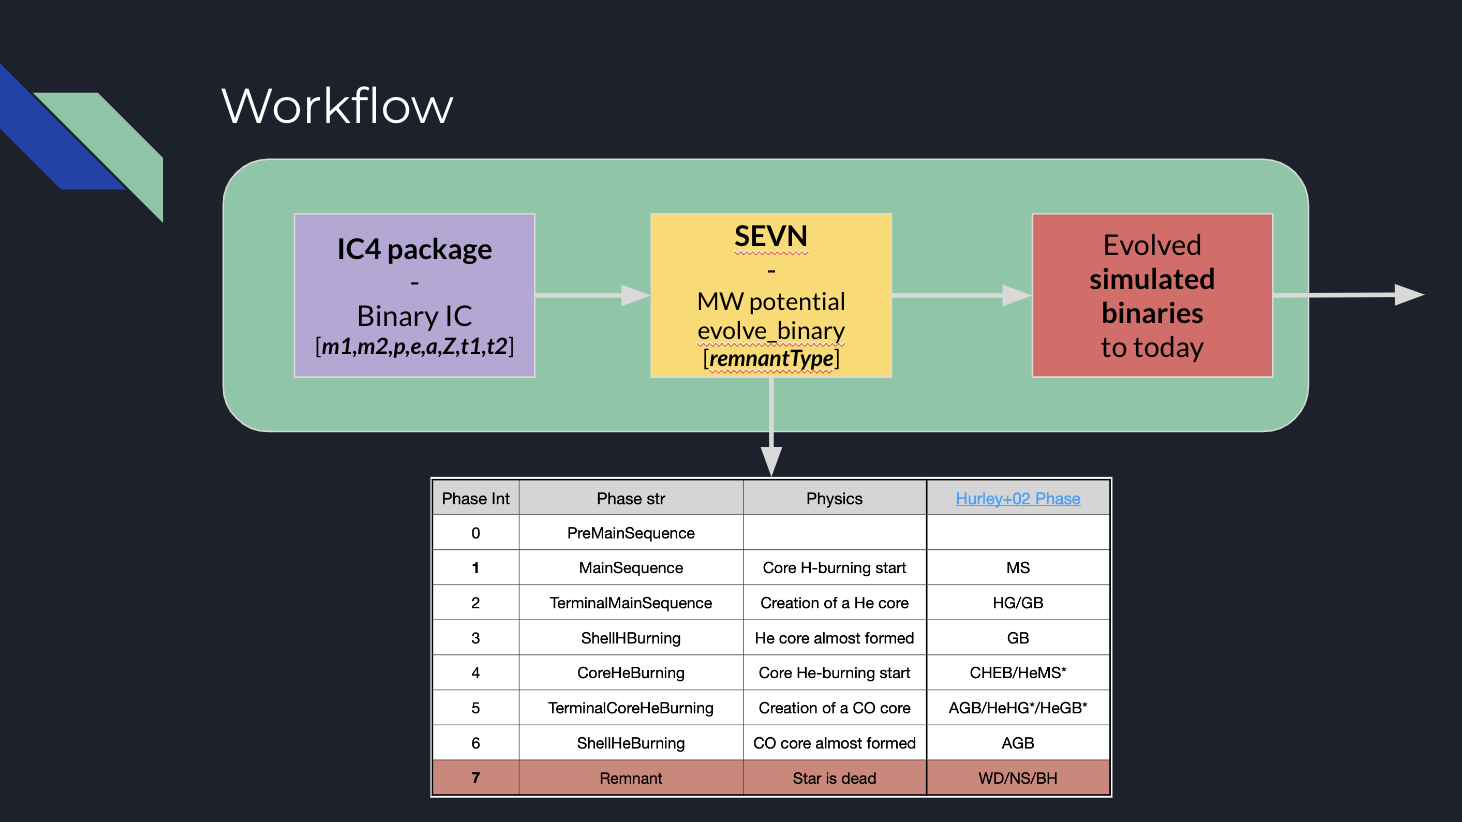

In [3]:
from IPython.display import Image, display

# Display an image from a local file with specified size
img_path = 'images/Workflow_1.png'
display(Image(filename=img_path, width=1000, height=800))  # Adjust width and height as needed

### **IC4 package**

IC4popsyn is a python module developed for generating the IC for stellar population-synthesis studies. 

In paricular, IC4popsyn includes some of the most used state-of-the-art models (e.g Sana+12) and implements the possibility to generate the IC in the format used by our population synthesis codes (i.e. MOBSE and SEVN).


#### **Default parameters**:
- **alphas**: list of power-law slopes for the initial mass function
- **mass_ranges**: list of mass ranges for the initial mass function
- **logP_min**: minimum logarithm of the period
- **logP_max**: maximum logarithm of the period
- **logP_slope**: slope of the period distribution
- **e_min**: minimum eccentricity
- **e_max**: maximum eccentricity
- **e_slope**: slope of the eccentricity distribution
- **q_min**: minimum mass ratio
- **q_max**: maximum mass ratio
- **q_slope**: slope of the mass ratio distribution
- **mass_min**: minimum mass
- **mass_min_policy**: policy for minimum mass ("qmin" or "mmin")


## Sampling of Binary Star Properties

In the `Binaries` class, the properties of binary stars are sampled as follows:

- **Primary Mass \( m_1 \)**: Drawn from an Initial Mass Function (IMF), reflecting the distribution of star masses.
- **Secondary Mass \( m_2 \)**: Determined by a mass ratio \( q \) (where \( q = m_2/m_1 \)), sampled from a power law distribution, ensuring \( m_2 \) meets specified limits.
- **Orbital Period \( p \)**: Sampled using a power law distribution over a defined range of logarithmic periods, resulting in realistic orbital periods.
- **Eccentricity \( e \)**: Sampled from a power law distribution between defined minimum and maximum values.
- **Semi-Major Axis \( a \)**: Derived from the period \( p \) using Kepler's laws, linking the period and masses to the separation.

### Power Law Definition

A power law describes a relationship where one quantity varies as a power of another, expressed as \( y = kx^n \), where \( k \) is a constant, \( x \) is the variable, and \( n \) is the exponent. This distribution is often used to characterize the frequency of occurrences across various values, such as masses and orbital periods.


A **broken power-law** for the Initial Mass Function (IMF) is a piecewise-defined function where the slope of the power law changes at certain mass thresholds

$\xi(m)$ =

 \begin{cases}
m^{-1.3}, & \text{if } 0.08 \leq m < 0.5 M_\odot \\
m^{-2.3}, & \text{if } 0.5 \leq m < 1 M_\odot \\
m^{-2.3}, & \text{if } m \geq 1 M_\odot
\end{cases}

### **Simulate Nbin binaries with IC4popsyn**

In [4]:
# Example usage
create_binary_population(Nbin=1001, backup=1, z=0.02, mass_ranges=[2.3, 150], alphas=[-2.3], q_max=4, mass_min=2.3, model='sana12')

/ |#                                                  | 0 Elapsed Time: 0:00:00
| |#                                                 | 83 Elapsed Time: 0:00:00


Building a population of binaries based on Sana+2012 and Kroupa2001


### **Convert IC files from .in to csvs**

In [5]:
convert_in_to_csv("petar_0.02.in", "petar_0.02.csv")

df_petar = pd.read_csv("petar_0.02.csv")

# add a column to df_petar for binary_id equal to the index place it at the beginning
df_petar.insert(0, 'binary_id', range(0, 0 + len(df_petar)))

df_petar.describe()

Conversion successful! Saved as petar_0.02.csv


/home/sevnuser/sevn/utils.py:1018: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(input_file, delim_whitespace=True, header=None, skiprows=1)


,binary_id,m1,m2,type1,type2,period,eccentricity,a,Z,tini
count,1001.000000,1001.000000,1001.000000,1001.0,1001.0,1001.000000,1001.000000,1.001000e+03,1.001000e+03,1001.0
mean,500.000000,7.824775,17.044174,1.0,1.0,14151.662690,0.372011,7.631970e+05,2.000000e-02,0.0
std,289.108111,12.720773,31.876949,0.0,0.0,46415.644684,0.303849,2.009090e+06,3.471181e-18,0.0
min,0.000000,2.300700,2.308300,1.0,1.0,1.412818,0.000000,1.959705e+03,2.000000e-02,0.0
25%,250.000000,2.842200,5.712700,1.0,1.0,5.319352,0.082300,6.917623e+03,2.000000e-02,0.0
50%,500.000000,3.951300,8.866000,1.0,1.0,50.146776,0.316100,3.113762e+04,2.000000e-02,0.0
75%,750.000000,6.844600,15.183300,1.0,1.0,1452.162443,0.609800,3.060852e+05,2.000000e-02,0.0
max,1000.000000,122.212700,448.403900,1.0,1.0,312565.347169,0.997800,1.829291e+07,2.000000e-02,0.0


In [6]:
# export to csv
df_petar.to_csv('petar_0.02.csv', index=False)

### **Evolve Binaries with SEVN**

4) Use those parameters distributions as input to astromet

5) Calculate simulated RUWE and rv error  

6) Plot RUWE vs rv error color coded by remnant type

In [7]:
evolved_binaries = run_sevn_simulations(df_petar, num_rows=1001, t_end=1000, snmodel="delayed", rseed=0)

Running SEVN simulations: 100%|██████████| 1001/1001 [01:32<00:00, 10.82it/s]


### **Use astromet + SEVN distributions to mock GAIA observations**

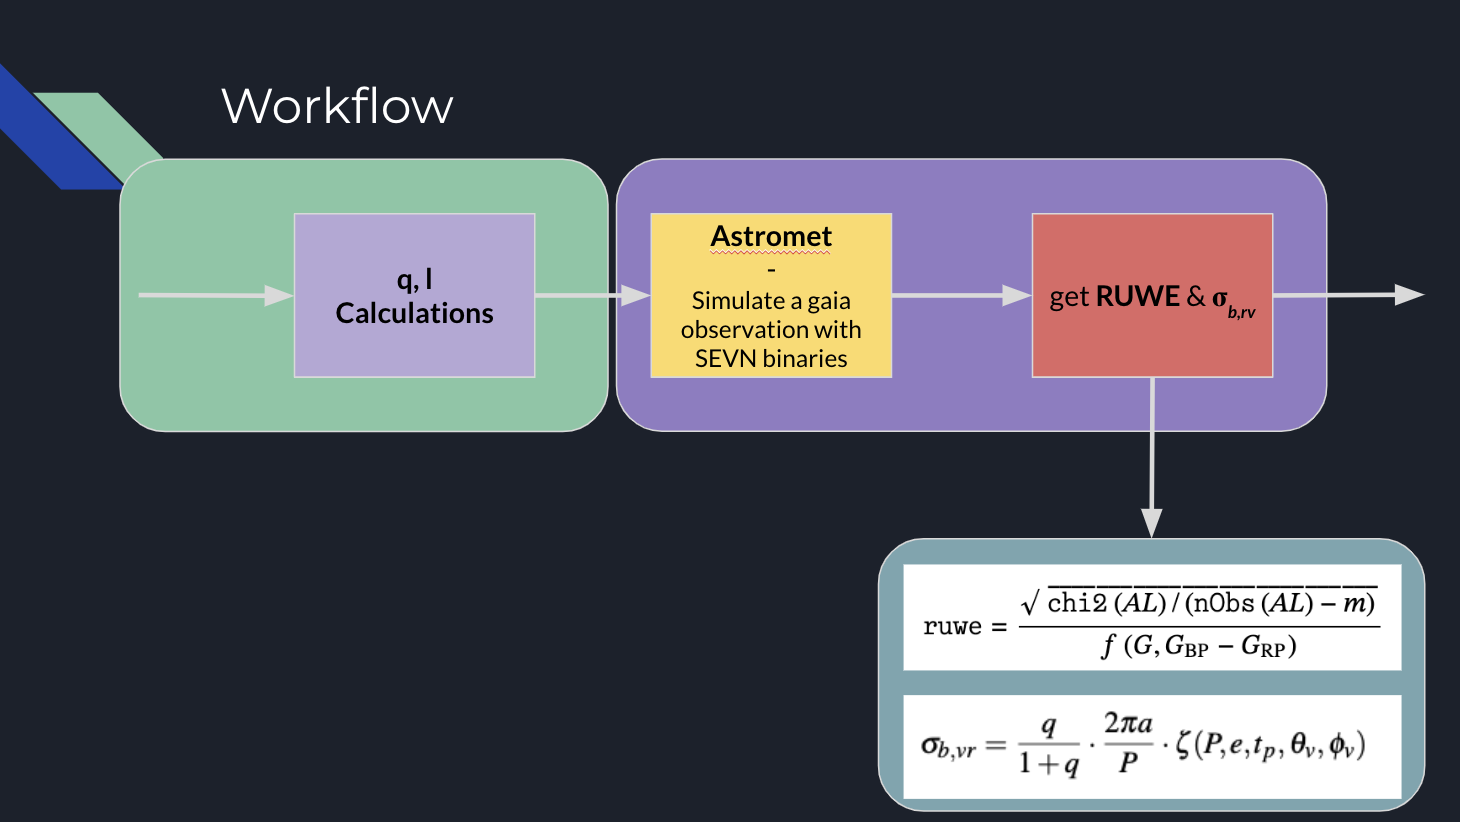

In [43]:
from IPython.display import Image, display

# Display an image from a local file with specified size
img_path = 'images/Workflow_2.png'
display(Image(filename=img_path, width=1000, height=800))  # Adjust width and height as needed

### Load ScanLaw file

In [9]:
# /Gaia/gedr3/auxiliary/commanded_scan_law/ @ https://cdn.gea.esac.esa.int/Gaia/gedr3/auxiliary/commanded_scan_law/
local_csv_filename = "data/cog/CommandedScanLaw_001.csv"

# Load the scanning law times from a local CSV file with the specified filename and version
dr3_sl = scanninglaw.times.Times(map_fname=local_csv_filename, version='dr3_nominal')

Loading auxilliary data ...
t = 74.285 s
  auxilliary:  53.347 s
          sf:  11.179 s
interpolator:   9.759 s


In [10]:
# Keep in the dataframe only Periods less than dr3Period = 2.8333333333333335 years
# convert dr3Period to Myr
# dr3Period = dr3Period * 10**6
# evolved_binaries = evolved_binaries[evolved_binaries['Period'] <= dr3Period]

### **Calculate q, l and parallax**

In [11]:
# using evolved_binaries dataframe calculate the mass ratio q and luminosity ratio l
evolved_binaries['q'] = evolved_binaries['Mass_1'] / evolved_binaries['Mass_0']
evolved_binaries['l'] = evolved_binaries['Luminosity_1'] / evolved_binaries['Luminosity_0']
evolved_binaries['Parallax'] = (1 / ((evolved_binaries['Semimajor']**3 / ((evolved_binaries['Mass_0'] + evolved_binaries['Mass_1'])\
                                         * evolved_binaries['Period']**2))**(1/3))) * 1000

In [12]:
# evolved_binaries

,Worldtime,Semimajor,Eccentricity,Period,RL0,RL1,GWtime,BEvent,Localtime_0,Localtime_1,...,dMRLOdt_0,dMRLOdt_1,dMaccwinddt_0,dMaccwinddt_1,Plife_0,Plife_1,binary_id,q,l,Parallax
0,0.000000,2.173346e+04,0.792300,116.714553,5.831938e+03,10877.792656,1.555344e+13,-1.0,0.295394,0.067969,...,0.0,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0,3.959525,2.587119e+01,4.650526
1,0.337890,2.204356e+04,0.792300,120.081190,5.943660e+03,10998.707063,1.700500e+13,-1.0,0.633284,0.405859,...,0.0,0.0,9.860998e-07,1.366682e-07,0.030565,0.100000,0,3.889751,2.613978e+01,4.650526
2,0.582092,2.227417e+04,0.792300,122.613467,6.027048e+03,11088.302855,1.815595e+13,-1.0,0.877486,0.650061,...,0.0,0.0,1.146240e-06,1.340369e-07,0.052655,0.172273,0,3.839306,2.633564e+01,4.650526
3,0.823903,2.250734e+04,0.792300,125.200915,6.111698e+03,11178.537629,1.938633e+13,-1.0,1.119297,0.891872,...,0.0,0.0,1.277917e-06,1.311473e-07,0.074529,0.243838,0,3.789340,2.653102e+01,4.650526
4,1.065653,2.274539e+04,0.792300,127.870460,6.198463e+03,11270.284537,2.071482e+13,-1.0,1.361047,1.133622,...,0.0,0.0,1.423376e-06,1.282415e-07,0.096398,0.315385,0,3.739372,2.672780e+01,4.650526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571722,9.374491,2.910836e+06,0.984741,312266.954971,1.219052e+06,990634.187161,1.925729e+19,-1.0,9.586353,9.454956,...,0.0,0.0,0.000000e+00,2.221352e-05,0.800000,0.000000,1000,0.634745,6.365696e-16,4.650526
571723,9.376312,2.912010e+06,0.984741,312518.820451,1.219373e+06,991193.001279,1.930889e+19,-1.0,9.588174,9.456777,...,0.0,0.0,0.000000e+00,2.658725e-05,0.900000,0.000000,1000,0.635164,6.063024e-16,4.650526
571724,9.378133,2.913367e+06,0.984741,312810.301179,1.219744e+06,991839.577214,1.936874e+19,-1.0,9.589995,9.458598,...,0.0,0.0,0.000000e+00,3.310426e-05,1.000000,0.000000,1000,0.635649,5.920455e-16,4.650526
571725,9.378133,NaN,NaN,NaN,NaN,NaN,NaN,19.0,9.589995,9.458598,...,0.0,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,1000,3.660261,2.579527e-11,NaN


### 1) Drop all NaN values represeting end of evolution
### 2) Keep only the last row of that star representing it's end of the evolution cycle
### 3) Set binary id as index

In [13]:
# remove nan values
evolved_binaries = evolved_binaries.dropna()

# keep only the last row where binary_id is unique
evolved_binaries = evolved_binaries.drop_duplicates(subset=['binary_id'], keep='last')

# make the binary_id the index
evolved_binaries = evolved_binaries.set_index('binary_id')

### Simulate a **Gaia Observation** with astromet and calculate **RUWE**

In [14]:
nTest=1001

allData = gaia_observation(nTest, evolved_binaries, astromet, Source, dr3_sl)

100%|██████████| 1001/1001 [01:37<00:00, 10.31it/s]


In [15]:
df = allData.to_pandas()

### Calculate $\zeta_0$ (P = B)

##### this result agrees well for all P < B but deviates at longer periods - Andrew et al

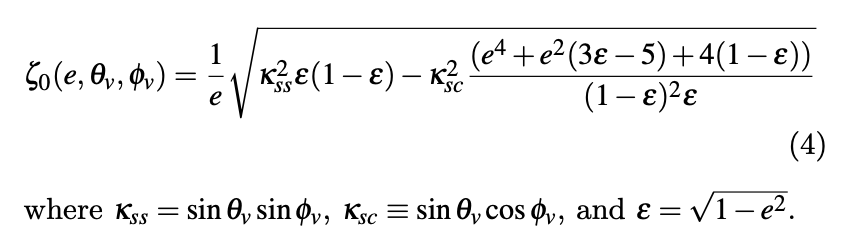

In [16]:
from IPython.display import Image, display

# Display an image from a local file with specified size
img_path = 'images/zeta_0.png'
display(Image(filename=img_path, width=400, height=300))  # Adjust width and height as needed


In [17]:
# test the function on df['e'], df['vTheta'], df['vPhi']
df['zeta_0'], indeces = zeta_0(df['e'], df['vTheta'], df['vPhi'])

/home/sevnuser/miniconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


# Calculate Radial Velocity Error
        
#### Assume P<=B and zeta = zeta_0

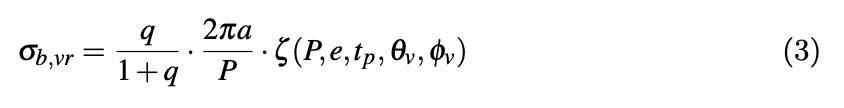

In [18]:
from IPython.display import Image, display

# Display an image from a local file with specified size
img_path = 'images/spectr_error.png'
display(Image(filename=img_path, width=400, height=300))  # Adjust width and height as needed


### Units: 
- q (none)
- a (AU)
- P (yrs)
- $\zeta_0$ (none)

$\sigma_{(b),(vr)}$ $\left(\frac{\text{AU}}{\text{yrs}}\right)$

In [19]:
df['sigma_spectroscopic_error'] = sigma_spectroscopic_error(df['q'], df['a'], df['P'], df['zeta_0'])

## Plot RUWE vs sigma_spectroscopic_error

In [20]:
remnant_type = {0: "PreMS - 0", 1: "MS - 1", 2: "TerminalMS - 2", 3: "ShellHBurning - 3", 4: "CoreHeBurning - 4",
                5: "TerminalCoreHeBurning - 5", 6: "ShellHeBurning - 6", 7: "CO - 7"}

/tmp/ipykernel_21082/867822063.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc=legend_loc)
/tmp/ipykernel_21082/867822063.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc=legend_loc)
/tmp/ipykernel_21082/867822063.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc=legend_loc)
/tmp/ipykernel_21082/867822063.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc=legend_loc)


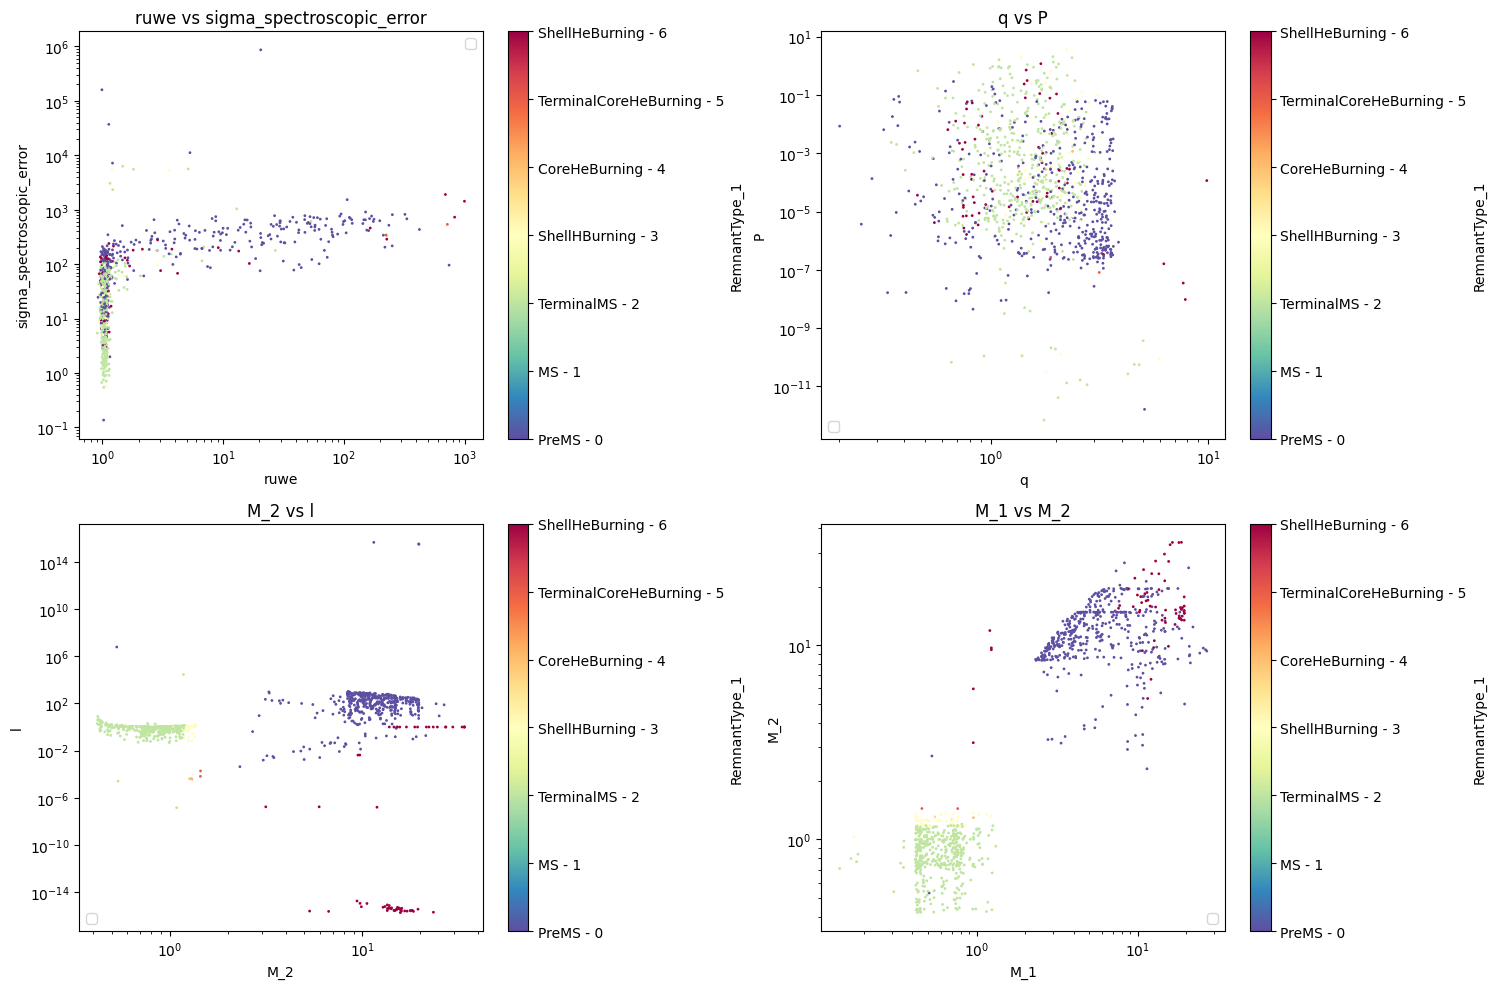

In [41]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1
plot_scatter_with_colorbar_combined(df, 'ruwe', 'sigma_spectroscopic_error', 'RemnantType_1', remnant_type, axs[0, 0], legend_loc='best')

# Plot 2
plot_scatter_with_colorbar_combined(df, 'q', 'P', 'RemnantType_1', remnant_type, axs[0, 1], legend_loc='lower left')

# Plot 3
plot_scatter_with_colorbar_combined(df, 'M_2', 'l', 'RemnantType_1', remnant_type, axs[1, 0], legend_loc='lower left')

# Plot 4
plot_scatter_with_colorbar_combined(df, 'M_1', 'M_2', 'RemnantType_1', remnant_type, axs[1, 1], legend_loc='lower right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [27]:
# Example usage
file_path = 'data/cog/gaia_dr3_cross.csv'
cross_df_filtered = process_gaia_data(file_path)

In [28]:
df_updated = match_and_update(df, cross_df_filtered)

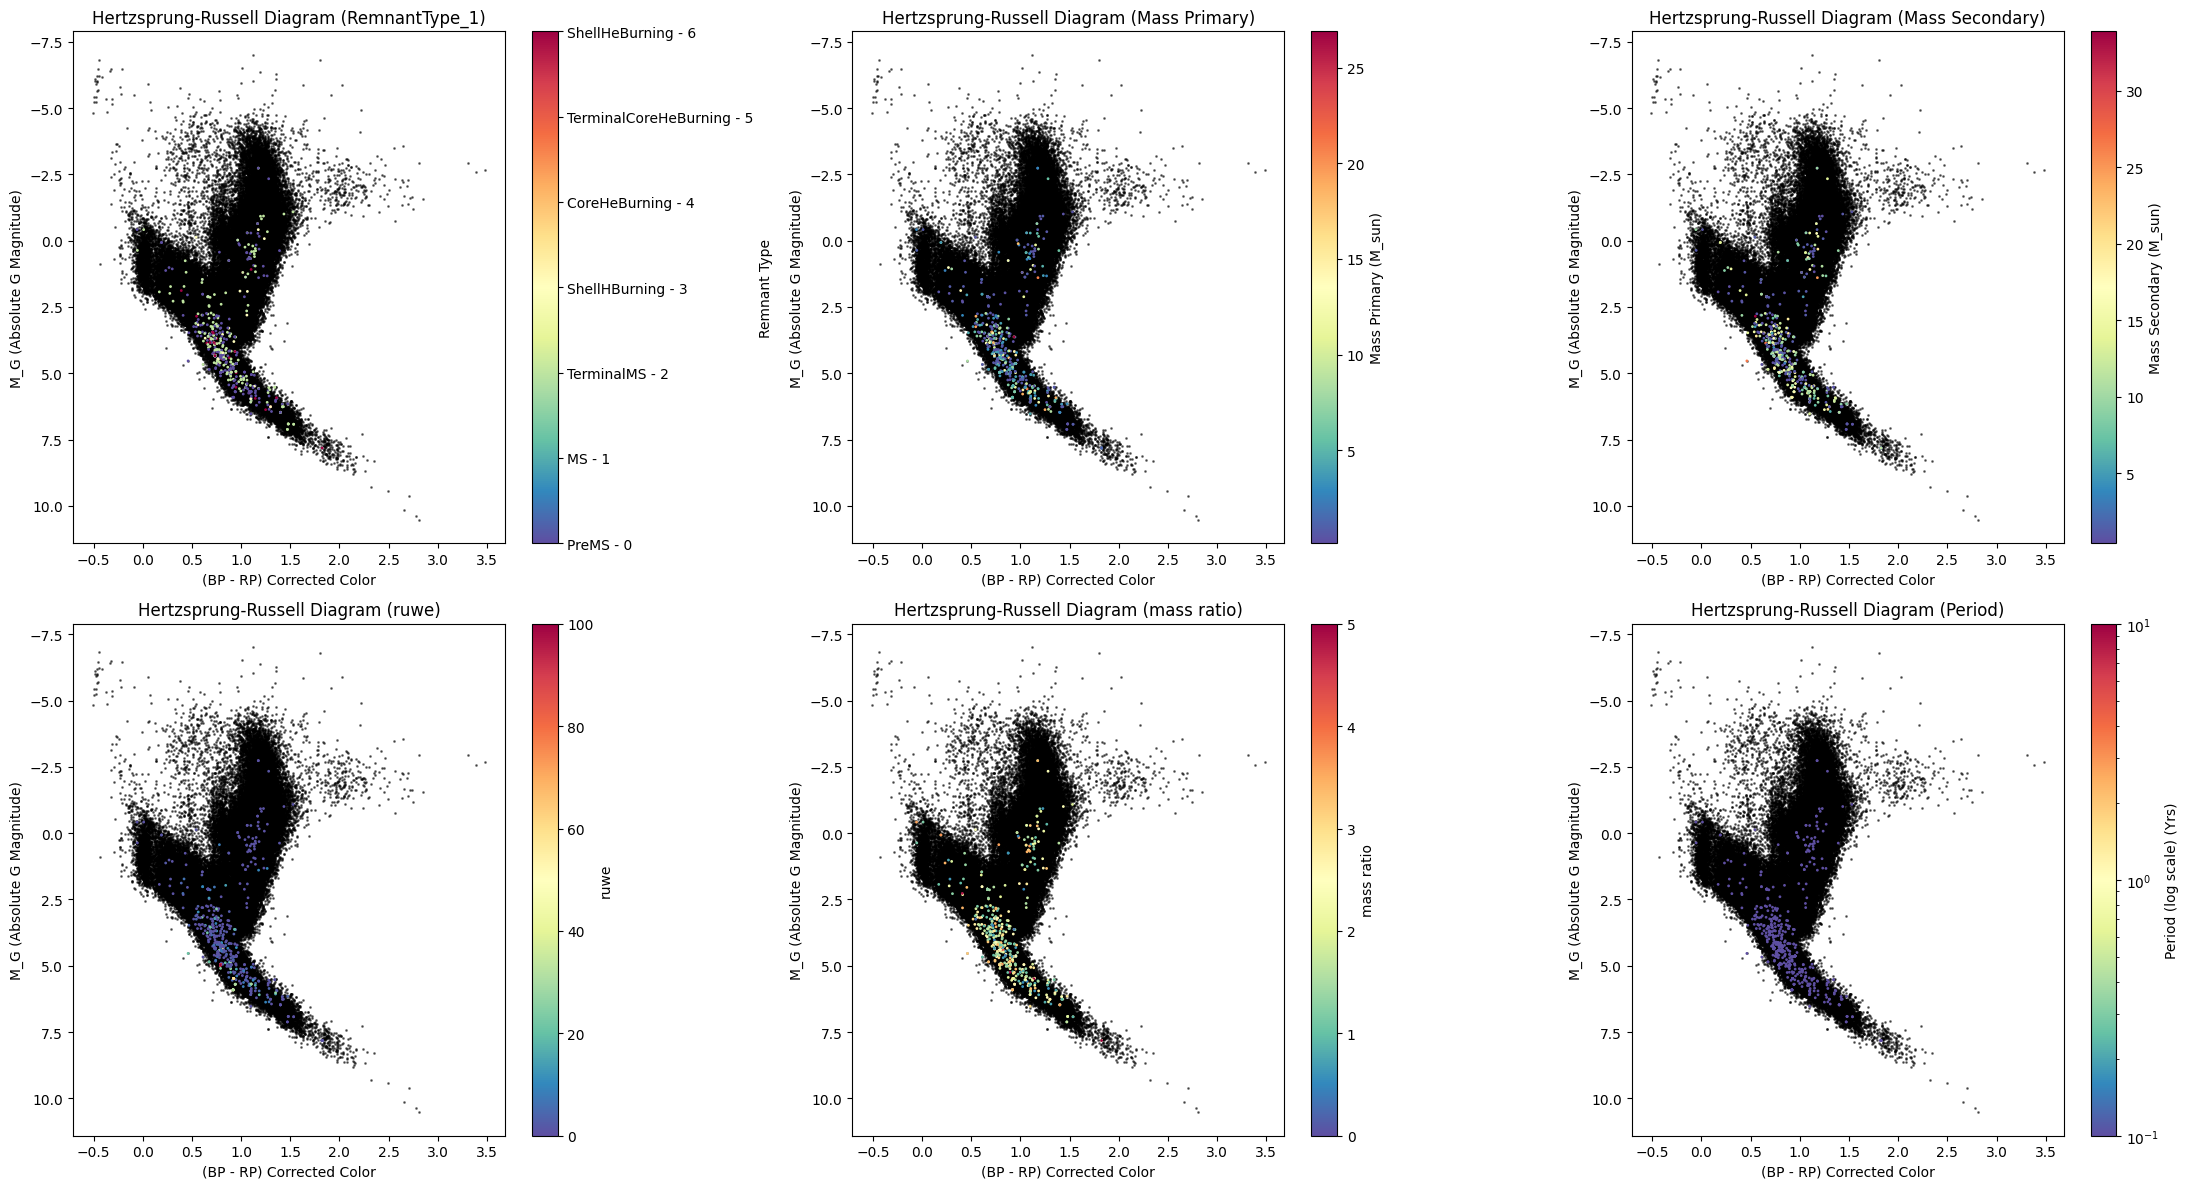

In [34]:
plot_hr_diagrams(df, cross_df_filtered)

# HR Diagram with \( M_G \) and \( BP - RP \)

The Hertzsprung-Russell (HR) diagram is a fundamental tool in astronomy that classifies stars based on their luminosity, temperature, and other properties. In this specific representation, we plot:

- **\( M_G \)**: The absolute magnitude of the star in the G band. This measures the intrinsic brightness of a star.

- **\( BP - RP \)**: The color index derived from the difference between the blue photometer (BP) and red photometer (RP) measurements. This value indicates the star's temperature, with bluer stars having lower values and redder stars having higher values.

### Key Features of the HR Diagram

- **Axes Orientation**: 
  - The y-axis (\( M_G \)) is inverted, meaning that higher values (brighter stars) appear lower on the graph.
  - The x-axis (\( BP - RP \)) measures temperature, with bluer (hotter) stars on the left and redder (cooler) stars on the right.

- **Stellar Evolution**: 
  - The diagram reveals various stellar populations, including:
    - **Main Sequence**: A diagonal line from the top left (hot, bright) to the bottom right (cool, dim).
    - **Giants and Supergiants**: Located above the main sequence, indicating they are bright but cooler than main sequence stars of the same luminosity.
    - **White Dwarfs**: Found in the lower left, representing remnants of stars that have shed their outer layers.

### Interpretation

- **Stellar Classification**: The diagram allows astronomers to classify stars based on their physical properties and evolutionary stages.
- **Color and Temperature Correlation**: The relationship between \( BP - RP \) and temperature enables the inference of various characteristics of stars, such as their mass, age, and composition.

Overall, this version of the HR diagram serves as a vital tool for understanding stellar populations and their evolution in the universe.

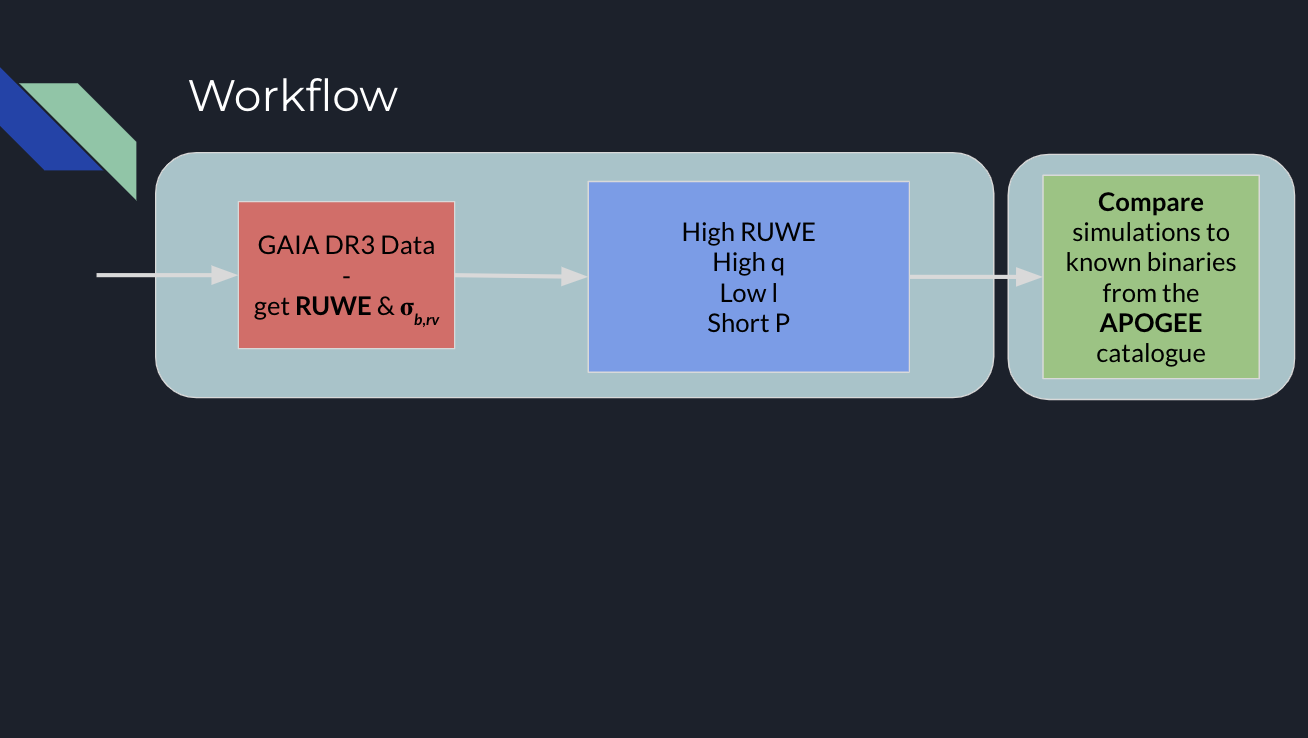

In [44]:
from IPython.display import Image, display

# Display an image from a local file with specified size
img_path = 'images/Workflow_4.png'
display(Image(filename=img_path, width=1000, height=800))  # Adjust width and height as needed